In [1]:
import warnings
import math
import numpy as np # to use numpy arrays instead of lists
import pandas as pd # DataFrame (table)
import matplotlib.pyplot as plt # to plot
from sklearn.model_selection import train_test_split
import sklearn.decomposition as sk # to compute PCA
from google.colab import drive
drive.mount('gdrive')

Mounted at gdrive


In [6]:
def main():
    warnings.filterwarnings("ignore")

    datos = leeDatos()
    #print(datos)

    #estados = [col[:] for col in datos.columns[:4]]
    estados = datos.columns[:4]
    #print(datos[estados])

    estados = ['Nacional', 'MEXICO', 'DISTRITO FEDERAL', 'GUANAJUATO', 'JALISCO', 'MORELOS','PUEBLA','QUERETARO']
    misDatos = datos[estados]
    print(datos[estados])

    graficaDatos(misDatos.iloc[0:290,:])#0:305])

    datosLin = linealizar(misDatos.iloc[0:290,:])#0:4])

    graficaDatos(datosLin)

    computeCorr(datosLin)

    num_comp = 3
    preprocessData = computePCA(datosLin, num_comp=num_comp)  #normSet

    graficaDatos(preprocessData)
    print("\n")

    ts_size = .25
    [trainSet, testSet] = splitDataSet(preprocessData, test_size=ts_size, randSplit=False)



def leeDatos():

    dataSet = pd.read_csv("gdrive/MyDrive/Colab Notebooks/covid.csv", header=0, index_col=0)
    dataSet.index = pd.to_datetime(dataSet.index,format='%d/%m/%y',errors='ignore')

    return dataSet

def graficaDatos(dataSet=0):

    plt.figure()
    for i in range(len(dataSet.columns)):
        plt.plot(dataSet.iloc[:,i],label=dataSet.columns[i],marker=i+2,markevery=150)
    plt.grid(color='b',linestyle='dashed')
    plt.gcf().autofmt_xdate()
    plt.title('COVID-19', fontweight='bold')
    plt.xlabel('Tiempo')
    plt.ylabel('Valor')
    plt.legend(loc='upper left')
    plt.show()

def linealizar(dataSet=0):
    """
    Normalize and smooth data
    """
    dataSet = dataSet.fillna(method='ffill')
    #dataSet = dataSet.dropna()

    # computing range of data for the regressions
    size = len(dataSet)
    x = range(size)
    numFeatures = len(dataSet.columns)

    for i in range(numFeatures):
        dataSet.iloc[:,i] = dataSet.iloc[:,i]  / dataSet.iloc[:,i].abs().max()
        polyCoef = np.polyfit(x, dataSet.iloc[:,i], 3)   # coefficients 10
        regModel = np.poly1d(polyCoef)              # equation
        regSpace = np.linspace(1, size, size)          # generate n numbers between a range
        dataSet.iloc[:,i] = regModel(regSpace)

    return dataSet

# compute PCA
def computeCorr(dataSet):
    """
    Compute CORRELATION
    """

    # correlation analysis
    correlation=dataSet.corr(method = 'pearson')
    print("==========================================================")
    print("                 CORRELATION ANALYSIS")
    print("----------------------------------------------------------")
    print(correlation)
    print("\n")


# compute PCA
def computePCA(dataSet, num_comp=3):
    """
    Compute PCA
    """
    features = dataSet
    features = features.drop([dataSet.columns[0]], axis=1)

    pca = sk.PCA(n_components=num_comp)
    principalComponents = pca.fit_transform(features)
    comp_names = ['P. Comp. {}'.format(i+1) for i in range(num_comp)]
    principalComp = pd.DataFrame(data = principalComponents.tolist(),
                                 columns = comp_names)
    principalComp.set_index(dataSet.index,inplace = True, drop=True)
    principalComp[dataSet.columns[0]] = dataSet[dataSet.columns[0]]
    cols = [dataSet.columns[0]] + sorted(comp_names)
    principalComp = principalComp[cols]
    print("==========================================================")
    print("                 PCA ANALYSIS")
    print("----------------------------------------------------------")
    print(principalComp)
    print("\n")

    # explained variance ratio
    varRatio = (pca.explained_variance_ratio_)*100
    dic = {'P. Comp. {}'.format(i+1): varRatio[i] for i in range(num_comp)}
    expVar = pd.DataFrame(dic, index=['Exp Var Ratio %'])

    # Principal axes in feature space, representing the directions of maximum variance
    # get the index of the most important feature on EACH component
    # LIST COMPREHENSION HERE
    most_important = [np.abs(pca.components_[i]).argmax() for i in range(num_comp)]
    # get the names
    initial_feature_names = features.columns
    most_important_names = [initial_feature_names[most_important[i]] for i in range(num_comp)]
    # complete the dataframe
    # LIST COMPREHENSION HERE AGAIN
    dic = {'P. Comp. {}'.format(i+1): most_important_names[i] for i in range(num_comp)}
    #df = pd.DataFrame(dic.items()).T
    expVar = pd.concat([expVar, pd.DataFrame(dic, index =['Most Imp. F.'])])
    print(expVar)
    print("\n")

    return principalComp

# --------------------
# split data
def splitDataSet(dataSet=0, test_size=.2, randSplit=True):
    """
    Split data in train and test sets
    """

    train, test = train_test_split(dataSet, test_size=test_size, shuffle=randSplit)

    return [train, test]

# main

            Nacional  MEXICO  DISTRITO FEDERAL  GUANAJUATO  JALISCO  MORELOS  \
date                                                                           
2020-02-26         0       0                 0           0        0        0   
2020-02-27         4       1                 2           0        0        0   
2020-02-28         2       1                 0           0        0        0   
2020-02-29         2       1                 0           0        0        0   
2020-03-01         2       0                 0           1        0        0   
...              ...     ...               ...         ...      ...      ...   
2023-06-20       444      30                74          17        8        1   
2023-06-21       405      28                77          13       10        2   
2023-06-22       388      39                79          10        6        2   
2023-06-23       213      15                37           5        7        0   
2023-06-24        15       1            

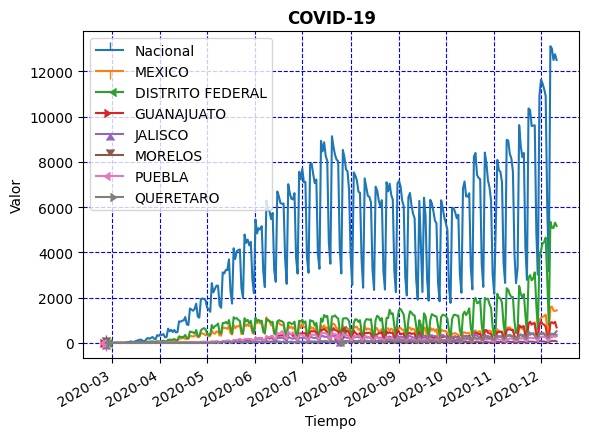

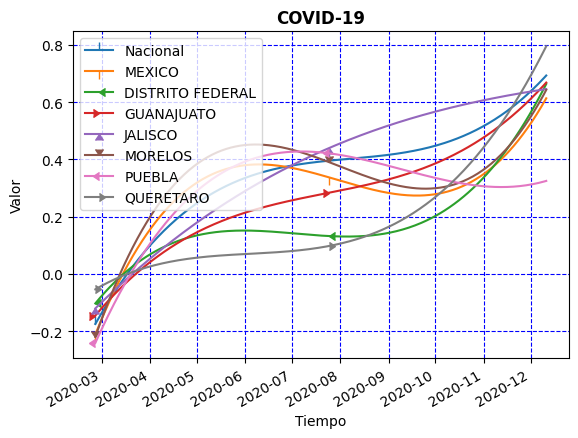

                 CORRELATION ANALYSIS
----------------------------------------------------------
                  Nacional    MEXICO  DISTRITO FEDERAL  GUANAJUATO   JALISCO  \
Nacional          1.000000  0.879905          0.846962    0.977791  0.963926   
MEXICO            0.879905  1.000000          0.773306    0.797412  0.727632   
DISTRITO FEDERAL  0.846962  0.773306          1.000000    0.906132  0.758837   
GUANAJUATO        0.977791  0.797412          0.906132    1.000000  0.963035   
JALISCO           0.963926  0.727632          0.758837    0.963035  1.000000   
MORELOS           0.818214  0.991266          0.691381    0.713531  0.649241   
PUEBLA            0.775409  0.837922          0.390842    0.627121  0.707866   
QUERETARO         0.797391  0.609155          0.965678    0.898229  0.771948   

                   MORELOS    PUEBLA  QUERETARO  
Nacional          0.818214  0.775409   0.797391  
MEXICO            0.991266  0.837922   0.609155  
DISTRITO FEDERAL  0.691381  0.39

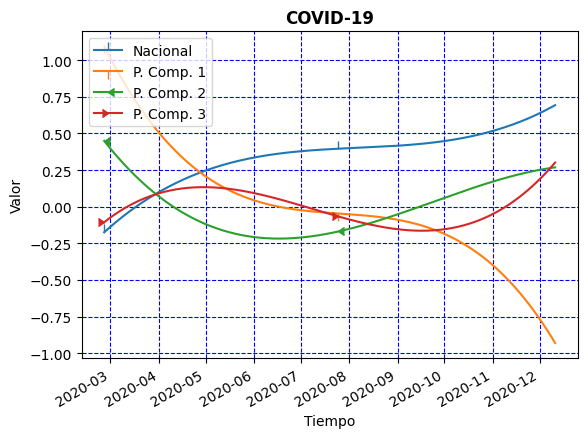

In [7]:
main()